#A. PERSIAPAN DATA DAN LIBRARY

Import Library Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import plotly.express as px

Import Data Python

Import data dari local disk pada computer

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving vgsales.csv to vgsales.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']))

#B. DATA DESCRIPTION

Menampilkan dataset tersebut (100 data pertama)

In [ ]:
data.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [ ]:
data.shape

(16598, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Deskripsi Data

Disini terlihat penjualan video games dari tahun ketahun dimulai tahun 1980-an ke tahun 2020. Dari penjualan tersebut, terdapat berbagai platform yang ada dimulai dari Nintendo generasi awal kemudian PC, Playstation 2 hingga Playstaion 4. Tidak hanya itu juga data disini memiliki judul game tersebut dengan penjualan di Jepang (JP), Amerika Utara menyangkut Amerika Serikat dan Kanada (NA), Eropa (EU) dan penjualan lainnya selain ketiga penjualan tersebut (Other)

#Data Understanding

Mengecek Apakah ada nilai Null atau tidak

In [ ]:
data.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Disini terlihat Tahun dan Publisher memiliki nilai Null. Oleh karena itu, maka kita akan membagi data tersebut menjadi data kategorikal dan data numerikal

In [ ]:
categorical_data=data.select_dtypes('O')
categorical_data.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [ ]:
numerical_data= data.select_dtypes(('int', 'float'))
numerical_data.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


Kita cek terlebuh dahulu apakah ada data yang kosong atau NaN. oleh karena itu kita lakukan dengan menggunakan data.isna().sum(). Data tersebut hitung berapa yang kosong

In [ ]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
data[['Year', 'Publisher']].describe(include='all')

,Year,Publisher
count,16327.000000,16540
unique,NaN,578
top,NaN,Electronic Arts
freq,NaN,1351
mean,2006.406443,NaN
std,5.828981,NaN
min,1980.000000,NaN
25%,2003.000000,NaN
50%,2007.000000,NaN
75%,2010.000000,NaN


Data yang kosong akan diisi dengan menggunakan Handling Missing Values dengan Mean. Hal ini dilakukan dengan menggunakan fillna(nama_dataset.obyek_yang_diganti.mean())

In [ ]:
data.Year=data.Year.fillna(data.Year.mean())

In [ ]:
data.Year= data.Year.astype('int64')
data.Year

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int64

Kita akan buat isian data tersebut pada Publisher yang kosong dengan menggunakan dataset.objek.fillna(dataset.objek.mode()[0])

In [ ]:
data.Publisher=data.Publisher.fillna(data.Publisher.mode()[0])

Kita cek lagi apakah ada data yang NaN.

In [ ]:
data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#Data Visualization

Disini, data akan diolah secara visual sehingga memperoleh hasil yang diinginkan

In [ ]:
GameGlobalSales = data['Global_Sales'].groupby(data['Name']).sum().sort_values(ascending=False).to_frame()
GameGlobalSales_top = GameGlobalSales.nlargest(15, 'Global_Sales')[['Global_Sales']]

fig = px.bar(data_frame=GameGlobalSales_top, x=GameGlobalSales_top.index, y='Global_Sales', color=GameGlobalSales_top.index)
fig.update_layout(title_text='Top 15 Penjualan Game Terbaik Di Dunia',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

Keterangan: Penjualan Wii Sports menduduki peringkat pertama dengan total 82 juta kopi diiringi dengan GTA V dengan total total 55.92 dan diikuti oleh Super Mario Bros., Tetris, Mario Kart Wii, Wii Sport Resort dan diakhiri dengan Call Of Duty: Ghosts.

In [ ]:
AnnualSales = data.groupby('Year')['Global_Sales'].sum().reset_index()
fig = px.line(AnnualSales, x=AnnualSales['Year'], y=AnnualSales['Global_Sales'],
              labels={
                  "index": "Year",
                  "Global_Sales": "Global Sales (M)"
              }
              )
fig.update_layout(title_text='Global Video Game Sales Annually',
                  title_x=0.5, title_font=dict(size=24))
fig.show()

Keterangan: Penjualan tertinggi terjadi pada tahun 2008 dan terendah pada tahun 1980

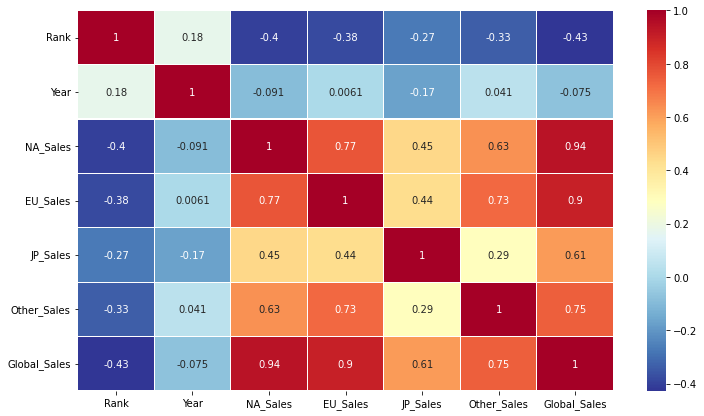

In [ ]:
corr_ = data.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')

plt.show()

In [ ]:
AnnualSalesMarket = data.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['NA_Sales'],
                         name="North America Sales",
                         hovertext=AnnualSalesMarket['NA_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['EU_Sales'],
                         name="Europe Sales",
                         hovertext=AnnualSalesMarket['EU_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['JP_Sales'],
                         name="Japan Sales",
                         hovertext=AnnualSalesMarket['JP_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['Other_Sales'],
                         name="Other Sales",
                         hovertext=AnnualSalesMarket['Other_Sales']))

fig.update_layout(title_text='Penjualan Video Game pada setiap Market',
                  title_x=0.5, title_font=dict(size=22))  # Location and the font size of the main title
fig.update_layout(
    xaxis_title="Years",
    yaxis_title="Sales (M)")

fig.show()

Keterangan: Penjualan Amerika dilihat memiliki penjualan tertinggi pada tahun 2008, Dieropa Penjualan Video Game berada di urutan kedua dan disusul dengan dunia dan terakhir Jepang. Tetapi pada tahun 2012-2014, terjadi perubahan dimana penjualan di Amerika menurun dan mendekati penjualan di Eropa sedangkan di Jepanga mengalami stagnan dan menyalip penjualan di dunia.